In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import matplotlib.cm as cm
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE
from sklearn.datasets import make_blobs,load_breast_cancer, load_digits
from scipy.cluster.hierarchy import dendrogram, ward
from sklearn.preprocessing import StandardScaler
from scipy.stats import mode
from sklearn.metrics import accuracy_score,homogeneity_score,completeness_score

%matplotlib inline

In [2]:
def display_dendogram(data,p=30):
    dendrogram(ward(data),p=p,truncate_mode='lastp')
    plt.xlabel("Sample number")
    plt.ylabel("Cluster distance")


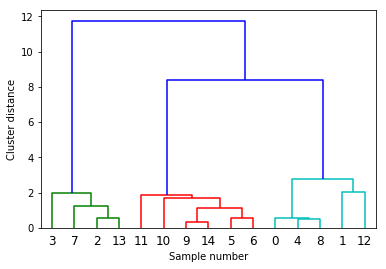

In [3]:
data,_ = make_blobs(random_state=0, n_samples=15)
display_dendogram(data)

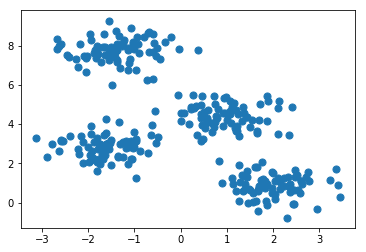

In [4]:
X, y = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)

In [5]:
aggl = AgglomerativeClustering(n_clusters=4)
y_aggl = aggl.fit_predict(X)

In [6]:
np.bincount(y_aggl)

array([75, 75, 75, 75], dtype=int64)

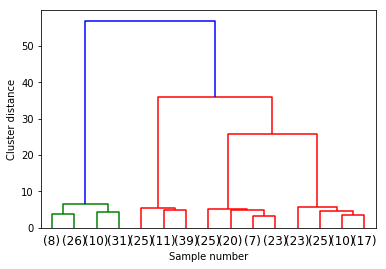

In [7]:
display_dendogram(X,p=15)

In [8]:
cancer_data = load_breast_cancer()

In [9]:
scaler = StandardScaler().fit(cancer_data.data)
X_cancer = scaler.transform(cancer_data.data)

In [10]:
aggl = AgglomerativeClustering(n_clusters=2)
cancer_aggl = aggl.fit_predict(X_cancer)

In [23]:
aggl = AgglomerativeClustering(affinity='cosine',linkage='average')
cancer_aggl = aggl.fit_predict(X_cancer)
get_cluster_accuracy(cancer_data.target,cancer_aggl,2)

(0.9420035149384886, 0.6701418994474315, 0.6934454965227045)

In [12]:
cancer_aggl.shape

(569,)

In [13]:
labels = np.zeros_like(cancer_aggl)

In [14]:
def get_cluster_accuracy(target,clusters,numClasses):
    labels = np.zeros_like(clusters)
    for i in range(numClasses):
        mask = (clusters == i)
        labels[mask] = mode(target[mask])[0]
    
    return accuracy_score(target, labels),homogeneity_score(target, labels),completeness_score(target,labels)

In [15]:
get_cluster_accuracy(cancer_data.target,cancer_aggl,2)

(0.9420035149384886, 0.6701418994474315, 0.6934454965227045)

In [16]:
digits = load_digits()
digits.data.shape
digits_data = digits.data/255

In [17]:
aggl = AgglomerativeClustering(n_clusters=10)
digits_aggl = aggl.fit_predict(digits_data)

In [18]:
digits_data.shape

(1797, 64)

In [19]:
digits_aggl[:10]

array([7, 9, 4, 1, 5, 1, 6, 3, 4, 1], dtype=int64)

In [20]:
get_cluster_accuracy(digits.target,digits_aggl,10)

(0.8619922092376182, 0.8532639308410057, 0.9021136486522541)

In [21]:
tsne = TSNE(n_components=2, init='random', random_state=0)
digits_projected = tsne.fit_transform(digits_data)


In [22]:
aggl = AgglomerativeClustering(n_clusters=10)
digits_aggl = aggl.fit_predict(digits_projected)

get_cluster_accuracy(digits.target,digits_aggl,10)

(0.9432387312186978, 0.9071262134893886, 0.9083625217388611)